In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dat

%matplotlib inline

In [2]:
auctions = pd.read_csv("data/auctions.csv.gzip",compression='gzip', dtype={'auction_type_id': 'float64', 'country': 'category', 'date': 'str',
                                                   'device_id': 'category', 'platform':'category', 'ref_type_id': 'category',
                                                   'source_id':'category'}, parse_dates = ['date'])
auctions.drop('auction_type_id', axis=1, inplace = True)
auctions.drop('country', axis=1, inplace = True)
auctions.head(5)

,date,device_id,platform,ref_type_id,source_id
0,2019-03-11 14:18:33.290763,6059599345986491085,1,1,0
1,2019-03-11 14:18:34.440157,1115994996230693426,1,1,0
2,2019-03-11 14:18:35.862360,7463856250762200923,1,1,0
3,2019-03-11 14:18:36.167163,7829815350267792040,1,1,0
4,2019-03-11 14:18:37.728590,1448534231953777480,1,1,0


In [3]:
auctions['hora']=auctions['date'].dt.hour
auctions['fecha']=auctions['date'].dt.date
auctions['dia_de_semana']=np.int8(auctions['date'].dt.weekday)
#auctions['dia_de_semana']=auctions['date'].dt.weekday
auctions['ocurrencias']=np.int8(1)
auctions.dtypes

date             datetime64[ns]
device_id              category
platform               category
ref_type_id            category
source_id              category
hora                      int64
fecha                    object
dia_de_semana              int8
ocurrencias                int8
dtype: object

In [4]:

auctions['source_id'].value_counts()

0    13354597
1     4016739
5     1466494
2      582083
6      151406
Name: source_id, dtype: int64

In [5]:
#auctions['filtro']=(auctions['date']>dat.datetime(year=2019,month=3,day=7))
subasta_semanal = auctions[auctions['date']>dat.datetime(year=2019,month=3,day=7)]
subasta_semanal['fecha'].value_counts()

2019-03-13    2938373
2019-03-12    2779910
2019-03-10    2637534
2019-03-11    2574916
2019-03-08    2303002
2019-03-09    2074552
2019-03-07    2047661
Name: fecha, dtype: int64

Text(0.5, 24.0, 'Hora')

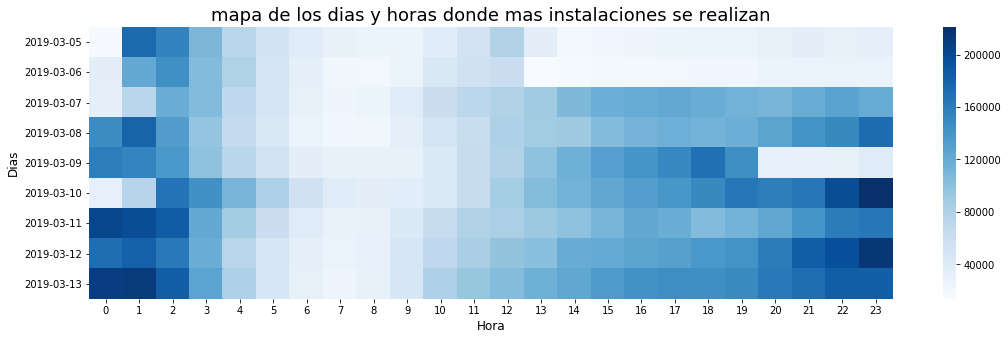

In [6]:
#subasta_semanal['dia_de_semana']=subasta_semanal['date'].dt.weekday
#subasta_semanal['ocurrencias']=np.int8(1)


tabla=auctions[['fecha', 'hora','ocurrencias']].groupby(['fecha','hora']).count()
matriz = tabla.unstack()
fig, ax =plt.subplots(figsize=(18,5))
title="mapa de los dias y horas donde mas instalaciones se realizan"
plt.title(title,fontsize=18)
tit=ax.title
ax.set_xticks([])
ax.set_yticks([])
etiquetaX=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
#etiquetaY=["Lunes","Martes","Miercoles","Jueves","Viernes","Sabado","Domingo"]
sns.heatmap(matriz,xticklabels=etiquetaX,fmt="", cmap='Blues',ax=ax);
ax.set_ylabel("Dias",fontsize=12)
ax.set_xlabel("Hora",fontsize=12)

In [7]:
tabla=auctions[['source_id', 'platform','ocurrencias']].groupby(['source_id','platform']).count()
#ax = sns.barplot(x="device_city", y="ocurrencias",hue="application_id", data=eventos_top)
#ax





#tabla=tabla.unstack()
tabla=tabla.reset_index()

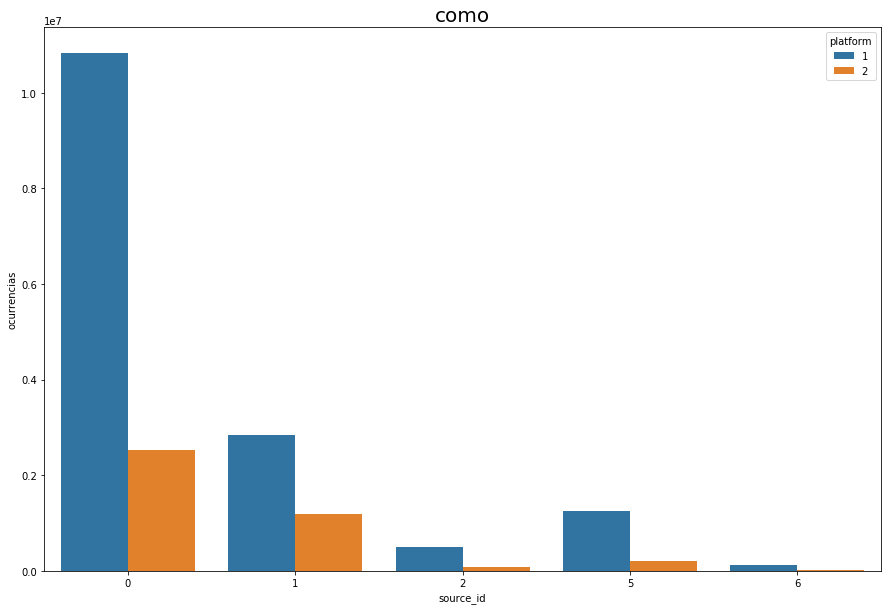

In [8]:


fig, ax =plt.subplots(figsize=(15,10))
ax=sns.barplot(x="source_id", y="ocurrencias", hue="platform", data=tabla)
#si tienen un titulo mejor avisen
ax.set_title("cuantas subastas ofrecen cada surce, correspondiente a los sistemas operativos ",fontsize=20)
ax


In [9]:
auctions.drop('dia_de_semana', axis=1, inplace = True)
auctions.drop('hora', axis=1, inplace = True)
auctions.drop('ocurrencias', axis=1, inplace = True)